# 1.7.1 Camera Calibration

In [22]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [23]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [24]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [37]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('.\iphone1\*.png') #('.\Image\*.png')

In [38]:
len(images)

21

In [40]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (10,7), None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,7), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#cv2.imshow('img',img)

NameError: name 'img' is not defined

## Calibration

In [29]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [30]:
mtx

array([[950.95963366,   0.        , 610.19707761],
       [  0.        , 956.41535479, 364.93599211],
       [  0.        ,   0.        ,   1.        ]])

In [31]:
dist

array([[-0.05764862, -0.11822246, -0.00154619,  0.00111039,  0.31320449]])

In [32]:
print(rvecs)

(array([[-1.08552456],
       [ 0.06716021],
       [ 0.05827999]]), array([[ 0.21320865],
       [-0.56483867],
       [-3.02944665]]), array([[-0.01050704],
       [ 0.33563326],
       [-3.10695321]]), array([[-0.02429271],
       [ 0.28048237],
       [ 3.12585608]]))


In [33]:
tvecs

(array([[-2.95323316],
        [ 2.42664883],
        [20.59237909]]),
 array([[-0.73301905],
        [ 5.63876516],
        [18.03900648]]),
 array([[ 2.31786971],
        [ 5.38097489],
        [17.22547779]]),
 array([[-2.03746669],
        [ 5.55891706],
        [17.64955564]]))

## Undistortion

In [41]:
img = cv2.imread('./Image/image50.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## 1. Using cv2.undistort()

In [42]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

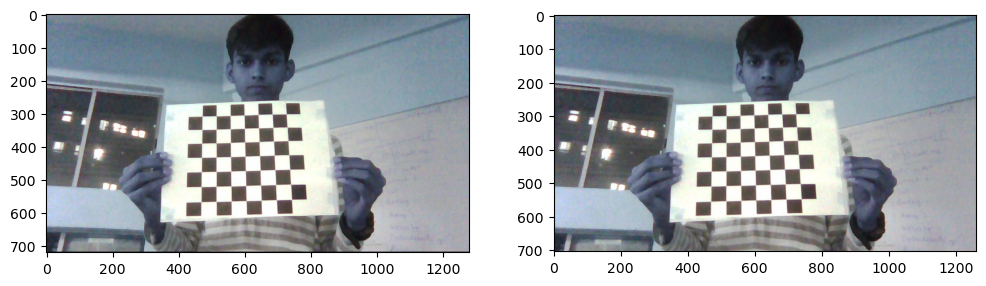

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [44]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

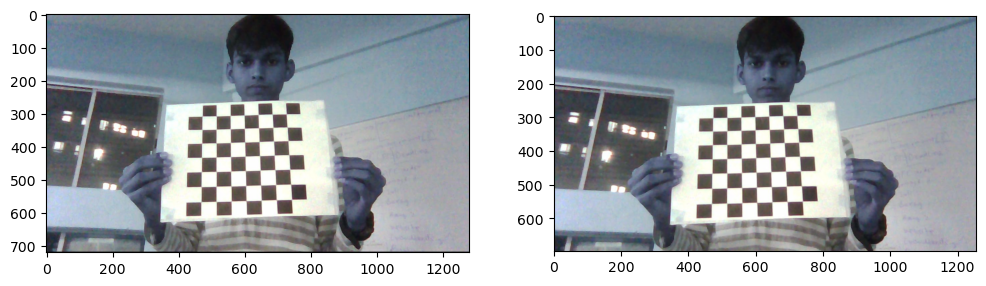

In [45]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [46]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\norm.cpp:1078: error: (-215:Assertion failed) _src1.sameSize(_src2) in function 'cv::norm'
